In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported successfully...")

Imported successfully...


In [2]:
# file path
titanic_dataset_path = (r"C:\Users\anim6\Desktop\ML_Data\Titanic Dataset.csv")
# load my dataset
titanic = pd.read_csv(titanic_dataset_path)
# confirm the load of the data
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
# print the summary of the data
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Data cleaning

### Age

In [4]:
age = titanic["age"]
# confirm whether there are NaN values in age
age.hasnans

True

In [5]:
print(age.size)
print(age.describe())

1309
count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64


In [6]:
# now we know the there are 263 missing values
age.size - age.count()

263

In [7]:
# I will fill the nan or the missing value with the mean age
age = titanic.age.fillna(age.median())

In [8]:
titanic['age'] = age
age.describe()

count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

### Sex

In [9]:
# sex = titanic.sex
# sex.describe()

In [10]:
# sex.hasnans/

In [11]:
# But sex is a categorical data and it has to numerical values
# so I can use the map() or replace()
# sex_mapping = {'male': 1, 'female': 0}
# Apply the map to the column
# titanic['sex'] = titanic['sex'].map(sex_mapping)
sex = titanic.sex.replace(['male','female'],[1,0]).astype(int)
titanic['sex'] = sex

C:\Users\anim6\AppData\Local\Temp\ipykernel_836\3005896483.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sex = titanic.sex.replace(['male','female'],[1,0]).astype(int)


In [12]:
sex.describe()

count    1309.000000
mean        0.644003
std         0.478997
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

### Ticket

In [13]:
ticket = titanic["ticket"]

In [14]:
ticket.hasnans

False

### Cabin

In [15]:
cabin = titanic["cabin"]
cabin.hasnans

True

In [16]:
print(cabin.size - cabin.count())

1014


In [17]:
cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [18]:
# cabin has most of the data missing and so I will be dropping it
titanic = titanic.drop('cabin', axis = 1)

In [19]:
titanic.sex.head()

0    0
1    1
2    0
3    1
4    0
Name: sex, dtype: int32

In [20]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

### Embarked

In [21]:
embarked = titanic['embarked']
embarked.hasnans

True

In [22]:
embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [23]:
# Fills all missing values (NaN) in the 'Embarked' column with 'S'
embarked = titanic['embarked'].fillna('S')

In [24]:
# Fills all missing values (NaN) in the 'Embarked' column with 'S'
titanic['embarked'] = embarked

In [25]:
titanic.embarked.describe()

count     1309
unique       3
top          S
freq       916
Name: embarked, dtype: object

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int32  
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1309 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 128.0+ KB


### Fare

In [27]:
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())
fare = titanic['fare']

In [28]:
fare.describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

### Dropping columns 

In [29]:
# dropping titanic['body'] and ['boat'] becuase most of the values are missing
titanic = titanic.drop(['body', 'boat','home.dest'], axis = 1)

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   int32  
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 97.3+ KB


## Exploratory Data Analysis 

1. Did women have a higher survival rate than men?
2. Did passengers in 1st Class (Pclass) survive more often than those in 3rd Class?
3. Did children (Age < 18) have a better chance of survival?
4. Did the port they Embarked from matter?
5. Visualize: Create bar charts, histograms, and heatmaps to see the relationships between these features (like Sex, Age, Pclass) and the Survived column.

--- Q1: Sex vs. Survival ---
sex
0    0.727468
1    0.190985
Name: survived, dtype: float64


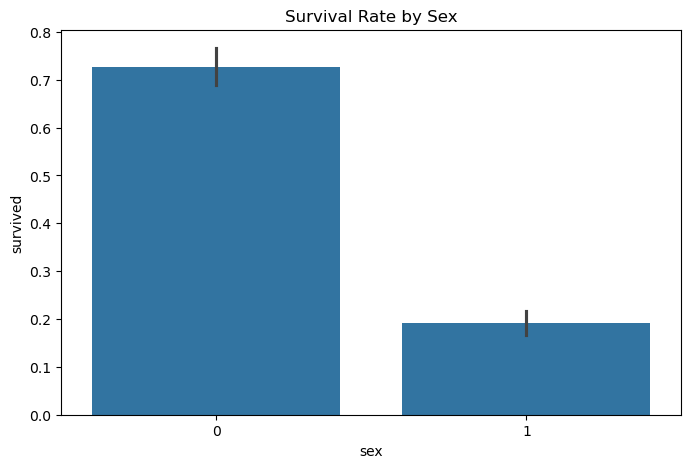

In [31]:
# --- 1. Sex vs. Survival ---
print("--- Q1: Sex vs. Survival ---")
# Calculate the mean survival rate (1=Survived, 0=Died)
print(titanic.groupby('sex')['survived'].mean())

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.show()

--- Q1: Pclass vs. Survival ---
pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64


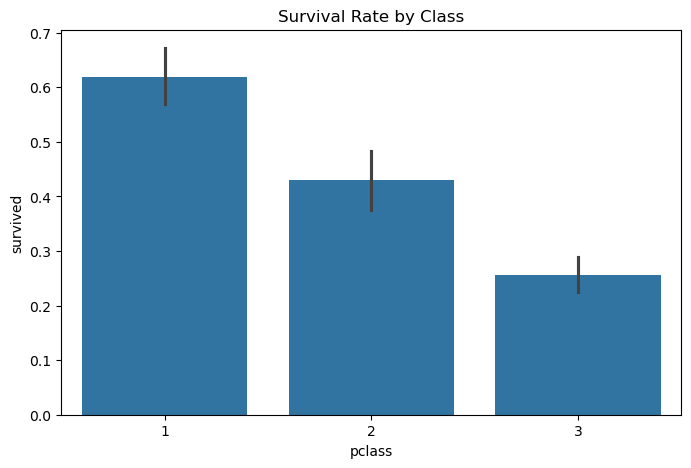

In [32]:
# --- 1. Class vs. Survival ---
print("--- Q1: Pclass vs. Survival ---")
# Calculate the mean survival rate (1=Survived, 0=Died)
print(titanic.groupby('pclass')['survived'].mean())

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.show()


--- Q3: Children vs. Survival ---
AgeGroup
Adult    0.362771
Child    0.525974
Name: survived, dtype: float64


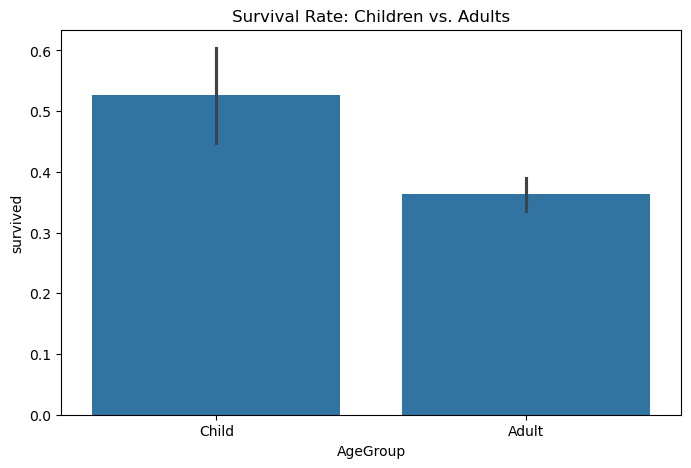

In [33]:
print("\n--- Q3: Children vs. Survival ---")
# First, create the 'AgeGroup' (Child/Adult) column
titanic['AgeGroup'] = titanic['age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

print(titanic.groupby('AgeGroup')['survived'].mean())

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='survived', data=titanic, order=['Child', 'Adult'])
plt.title('Survival Rate: Children vs. Adults')
plt.show()


--- Q4: Embarked Port vs. Survival ---
embarked
C    0.555556
Q    0.357724
S    0.334061
Name: survived, dtype: float64


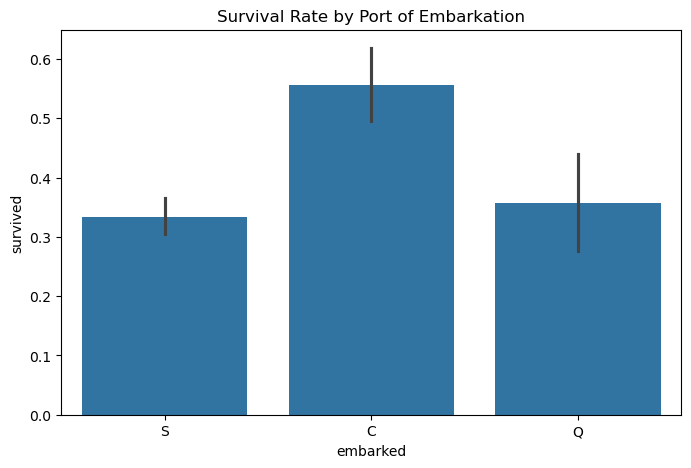

In [34]:
# --- 4. Embarked vs. Survival ---
print("\n--- Q4: Embarked Port vs. Survival ---")
print(titanic.groupby('embarked')['survived'].mean())

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='embarked', y='survived', data=titanic)
plt.title('Survival Rate by Port of Embarkation')
plt.show()


--- Bonus: Plotting Age Distribution ---


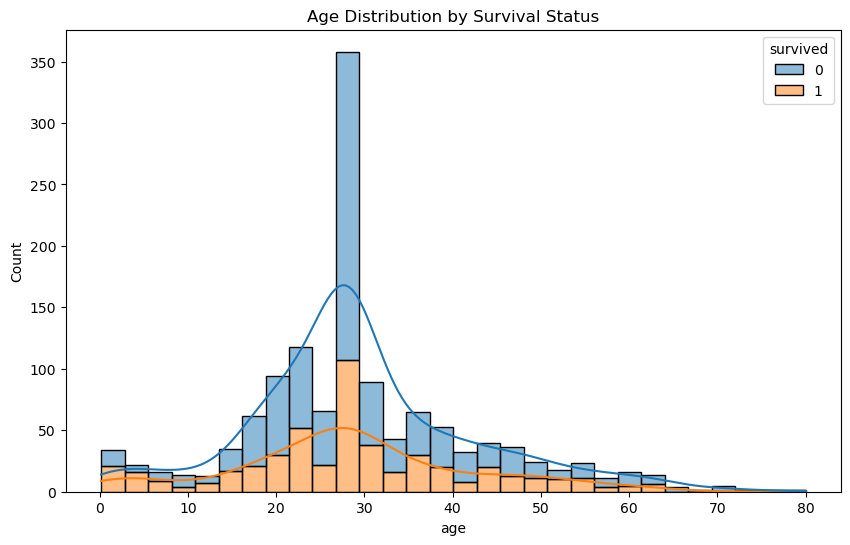

In [35]:
# Histogram: Age Distribution by Survival
print("\n--- Bonus: Plotting Age Distribution ---")
plt.figure(figsize=(10, 6))
# Plot histograms for both who survived and who didn't
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', kde=True, bins=30)
plt.title('Age Distribution by Survival Status')
plt.show()

In [36]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'AgeGroup'],
      dtype='object')


--- Bonus: Plotting Correlation Heatmap ---


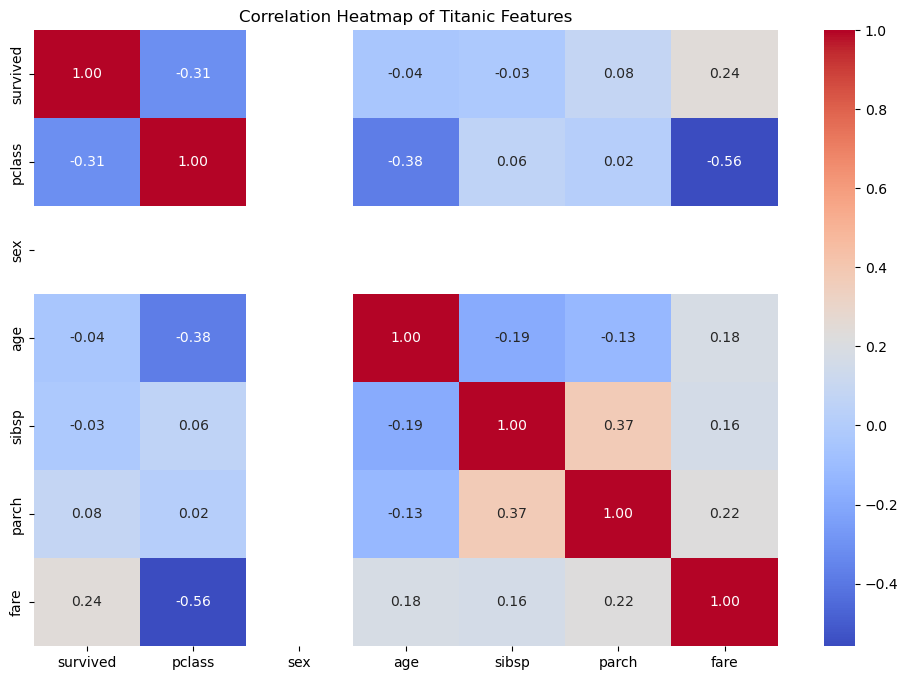

In [37]:
# Heatmap: Correlation of Features
print("\n--- Bonus: Plotting Correlation Heatmap ---")
# Create a copy to convert 'Sex' to numbers for the heatmap
titanic_corr = titanic.copy()
titanic_corr['sex'] = titanic_corr['sex'].map({'male': 1, 'female': 0})

# Select only relevant numeric columns
numeric_cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
corr_matrix = titanic_corr[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Features')
plt.show()

## Explanation from the grahps

1. **Sex vs. Survival:** Your gender was the single most important factor in survival. Women were protected ('women and children first') and had a dramatically higher chance of surviving than men.

2. **Pclass vs. Survival:** Your money and status mattered significantly. First-class passengers had a much higher survival rate than second-class passengers, and both were far more likely to survive than third-class passengers.

3. __Age vs. Survival:__ Being a child (under 18) gave you a much better chance of survival than being an adult.